# CLASSIFICATION

In [1]:
# LIBRARIES
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet
import io #Used as buffer
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.option_context('display.colheader_justify','left')
pd.set_option('display.precision',20)

### Import pydotplus e graphviz ma non riesco ad usarli

In [2]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'
from sklearn import tree
from IPython.display import Image

In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydotplus

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import graphviz
from graphviz import Digraph

## Data preparation

In [75]:
df = pd.read_csv(r'file:employees_attrition_clean.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0  27.0       Yes  Travel_Frequently        763                   Sales                15          2           Medical                        1   Male          59               1         2         Sales Executive                4      Divorced         4298.0        22098                   6      Y      Yes                 14                3.0                         4           80.0                 2                  7                    1.0                2             2.0                   2                        2                     2
1  30.0       Yes      Travel_Rarely       1079                   Sales                16          4         Marketing                        1   Male          70               3         3         Sales Executive                3       Married         5304.0        19002                   2      Y       No                 13                4.0                         1           80.0                 3                 10                    2.0                3             8.0                   0                        0                     0
2  56.0        No         Non-Travel        150  Research & Development                 2          4  Technical Degree                        4   Male          60               3         2  Manufacturing Director                4      Divorced         6306.0        17433                   2      Y       No                 11                4.0                         3           80.0                 1                 12                    2.0                2            13.0                   3                        1                     4
3  41.0       Yes      Travel_Rarely        359         Human Resources                18          5   Human Resources                        4   Male          89               4         1         Human Resources                1       Married         6430.0        21495                   0      Y       No                 17                3.0                         3           80.0                 0                  2                    4.0                3             3.0                   0                        0                     0
4  42.0        No      Travel_Rarely        642  Research & Development                 1          3     Life Sciences                        4   Male          76               3         1      Research Scientist                4       Married         2766.0        21412                   3      Y       No                 22                4.0                         1           80.0                 1                 12                    6.0                3             5.0                   3                        1                     0

In [77]:
#conversion of attrition: 1 = YES; 0 = NO 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})

In [78]:
df = df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

In [79]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')
df = df.drop(columns = 'Over18')

df.head()

Age  Attrition              Department  DistanceFromHome    EducationField  EnvironmentSatisfaction Gender  JobInvolvement                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
0  27.0          1                   Sales                15           Medical                        1   Male               1         Sales Executive                4      Divorced         4298.0                   6         1                 14                3.0                         4                 2                  7                    1.0                2             2.0                        2                     2
1  30.0          1                   Sales                16         Marketing                        1   Male               3         Sales Executive                3       Married         5304.0                   2         0                 13                4.0                         1                 3                 10                    2.0                3             8.0                        0                     0
2  56.0          0  Research & Development                 2  Technical Degree                        4   Male               3  Manufacturing Director                4      Divorced         6306.0                   2         0                 11                4.0                         3                 1                 12                    2.0                2            13.0                        1                     4
3  41.0          1         Human Resources                18   Human Resources                        4   Male               4         Human Resources                1       Married         6430.0                   0         0                 17                3.0                         3                 0                  2                    4.0                3             3.0                        0                     0
4  42.0          0  Research & Development                 1     Life Sciences                        4   Male               3      Research Scientist                4       Married         2766.0                   3         0                 22                4.0                         1                 1                 12                    6.0                3             5.0                        1                     0

In [80]:
#let's make a copy of the dataframe with encoded columns
data = df.copy()
label_encoders = dict()
column2encode = ["Department" , "EducationField" , "Gender" , "JobRole" , "MaritalStatus"]

for col in column2encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [13]:
def report(results, n_top=3):
    """function return the best parameter for a classifier"""
    md = []
    ms = []
    ml = []
    cr = []
    mean = []
    std = []
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            mean.append( results['mean_test_score'][candidate])
            std.append(results['std_test_score'][candidate])
            ms.append(random_search.cv_results_['params'][candidate]['min_samples_split'])
            ml.append(random_search.cv_results_['params'][candidate]['min_samples_leaf'])
            cr.append(random_search.cv_results_['params'][candidate]['criterion'])
            md.append(random_search.cv_results_['params'][candidate]['max_depth'])
    dres = pd.DataFrame()
    dres['Mean Test Score'] = mean
    dres['Standard Deviation Test Score'] = std
    dres['Min Sample Leaf'] = ml
    dres['Min Sample Split'] = ms
    dres['Criterion'] = cr
    dres['Max Depth'] = md
    return dres

def report_verbose(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Model with rank: {0}".format(i))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Split 

In [82]:
attributes = [col for col in data.columns if col != 'Attrition']
X = data[attributes].values
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42, stratify=y)

In [83]:
'''attributes = [col for col in data.columns if col != 'Attrition']
X = data[attributes].values
y = data['Attrition']

X_train, y_train = (X, y)'''

"attributes = [col for col in data.columns if col != 'Attrition']\nX = data[attributes].values\ny = data['Attrition']\n\nX_train, y_train = (X, y)"

In [84]:
'''attributes = [col for col in dk1.columns if col != 'Attrition']
X1 = dk1[attributes].values
y1 = dk1['Attrition']

X_test, y_test = (X1, y1)'''

"attributes = [col for col in dk1.columns if col != 'Attrition']\nX1 = dk1[attributes].values\ny1 = dk1['Attrition']\n\nX_test, y_test = (X1, y1)"

In [85]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(897, 23)
(449, 23)
(897,)
(449,)


In [86]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.8294314381270903036
1    0.1705685618729096964
Name: Attrition, dtype: float64
y_test class distribution
0    0.83073496659242762608
1    0.16926503340757237392
Name: Attrition, dtype: float64


## Decision Tree

In [87]:
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [10, 20, 30, 40, 50, 60, 90, 100, 110, 120, 130, 140, 150],
              'min_samples_leaf': [10, 20, 30, 40, 50, 60, 90, 100, 110, 120, 130, 140, 150],
              'criterion': ['gini', 'entropy'],
             }

dtc = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle = True)

cvs = []
results = []

random_search = RandomizedSearchCV(dtc, param_distributions=param_list, n_iter=100, cv = skf)

random_search.fit(X, y)
dres = pd.DataFrame
dres = report(random_search.cv_results_, n_top=20).copy()
report_verbose(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.844 (std: 0.014)
Model with rank: 1
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 60, 'max_depth': 34, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.840 (std: 0.018)
Model with rank: 2
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_depth': 47, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.840 (std: 0.018)
Model with rank: 2
Parameters: {'min_samples_split': 140, 'min_samples_leaf': 50, 'max_depth': 30, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.840 (std: 0.018)
Model with rank: 2
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_depth': 36, 'criterion': 'entropy'}



In [20]:
#parametri migliori
dres.sort_values(by='Mean Test Score' , ascending = False).head(10)

Mean Test Score  Standard Deviation Test Score  Min Sample Leaf  Min Sample Split Criterion  Max Depth
0   0.84398009950248753519         0.01410691664949497576               60                40   entropy       14.0
1   0.84398009950248753519         0.01410691664949497576               60               130   entropy        7.0
2   0.84398009950248753519         0.01410691664949497576               60                90   entropy       44.0
3   0.84398009950248753519         0.01410691664949497576               60               120   entropy       37.0
4   0.84398009950248753519         0.01410691664949497576               60               110   entropy       23.0
5   0.83950801547816467085         0.01810355009971765725               50               120   entropy       44.0
6   0.83950801547816467085         0.01810355009971765725               50               130   entropy        NaN
7   0.83950801547816467085         0.01810355009971765725               50                40   entropy        NaN
8   0.83950801547816467085         0.01810355009971765725               50                10   entropy        5.0
11  0.83653952459922609197         0.01536995261488406997               60                90      gini       22.0

#### Graphs to understand the correlation between mean and standard deviation. In theory when the mean increases the SD decreases.

Text(0.5, 0, 'Min Sample Leaf')

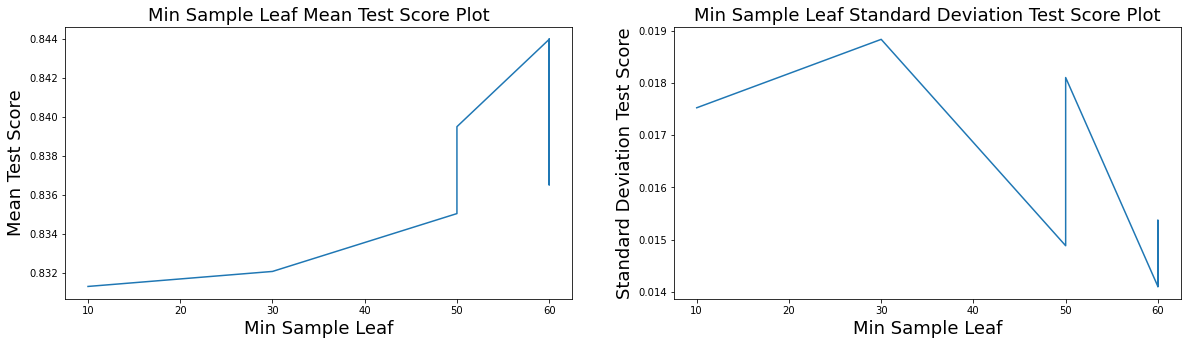

In [21]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Min Sample Leaf', ascending=False).set_index('Min Sample Leaf')['Mean Test Score'].plot(kind='line')
plt.title('Min Sample Leaf Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Min Sample Leaf', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Min Sample Leaf', ascending=False).set_index('Min Sample Leaf')['Standard Deviation Test Score'].plot(kind='line')
plt.title('Min Sample Leaf Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Min Sample Leaf', fontsize = 18)

#fig.savefig("Latex/images/min_sample_leaf")

Text(0.5, 0, 'Min Sample Split')

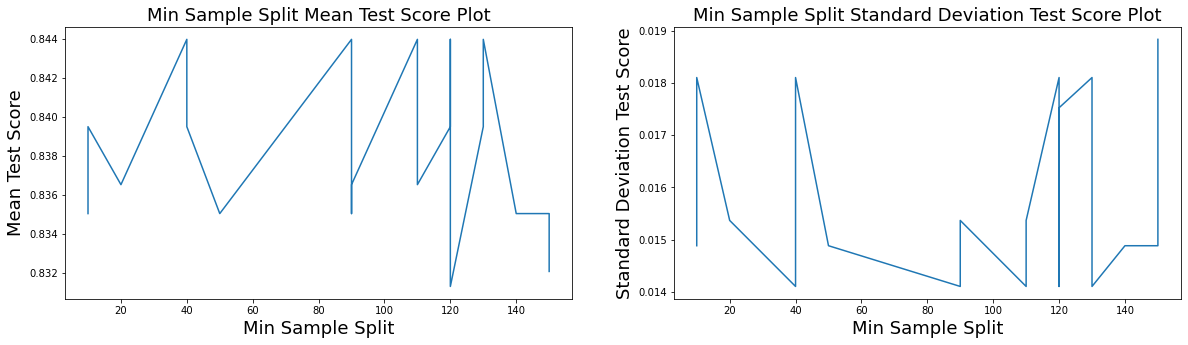

In [22]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Min Sample Split', ascending=False).set_index('Min Sample Split')['Mean Test Score'].plot(kind='line', title='Gender')
plt.title('Min Sample Split Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Min Sample Split', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Min Sample Split', ascending=False).set_index('Min Sample Split')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
plt.title('Min Sample Split Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Min Sample Split', fontsize = 18)

Text(0.5, 0, 'Criterion')

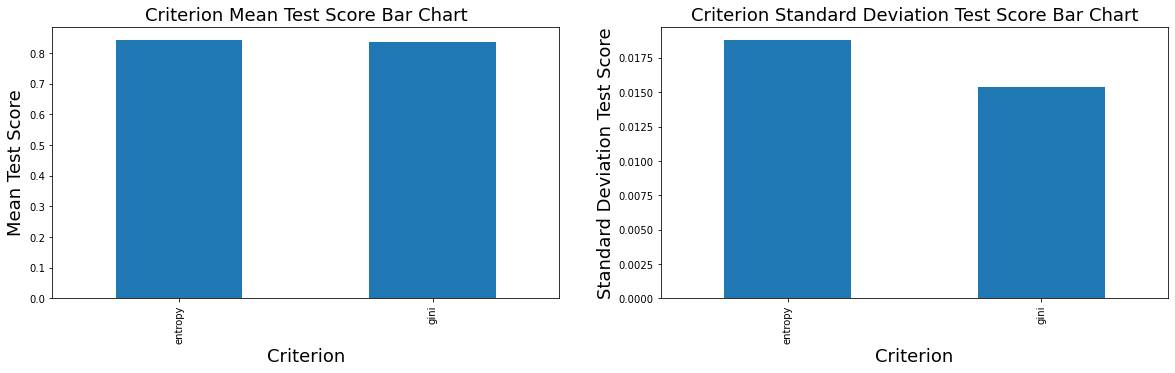

In [23]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
#dres.sort_values(by='Criterion', ascending=False).set_index('Criterion')['Mean Test Score'].plot(kind='line', title='Gender')
dres.groupby(['Criterion']).max()['Mean Test Score'].plot(kind='bar')
plt.title('Criterion Mean Test Score Bar Chart', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Criterion', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
#dres.sort_values(by='Criterion', ascending=False).set_index('Criterion')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
dres.groupby(['Criterion']).max()['Standard Deviation Test Score'].plot(kind='bar')
plt.title('Criterion Standard Deviation Test Score Bar Chart', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Criterion', fontsize = 18)

Text(0.5, 0, 'Max Depth')

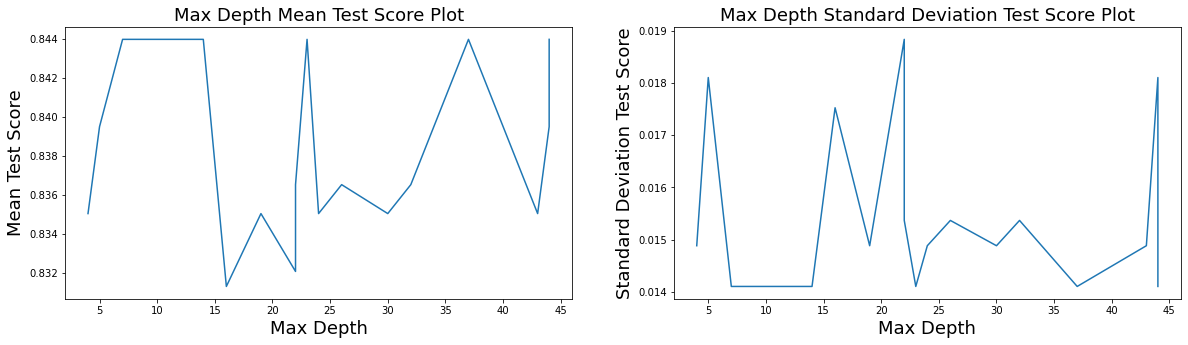

In [24]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Max Depth', ascending=False).set_index('Max Depth')['Mean Test Score'].plot(kind='line', title='Gender')
plt.title('Max Depth Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Max Depth', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Max Depth', ascending=False).set_index('Max Depth')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
plt.title('Max Depth Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Max Depth', fontsize = 18)
#fig.savefig("Latex/images/max_depth")

### Perform Clustering

In [25]:
print(random_search.best_estimator_)
dtc = random_search.best_estimator_
#dtc = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=40,
                       #min_samples_split=90)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=60,
                       min_samples_split=40)


In [26]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=60,
                       min_samples_split=40)

In [27]:
y_pred = dtc.predict(X_test)
y_pred_tr = dtc.predict(X_train)

### Analyze the classification results

#### Features Importance

In [28]:
for col, imp in zip(attributes, dtc.feature_importances_):
    print(col, imp)

Unnamed: 0 0.0
Age 0.0
Department 0.0
DistanceFromHome 0.0
EducationField 0.0305452047088017
EnvironmentSatisfaction 0.09834722016444333
Gender 0.0
JobInvolvement 0.0
JobRole 0.0
JobSatisfaction 0.06715750169612988
MaritalStatus 0.0
MonthlyIncome 0.08468491322289251
NumCompaniesWorked 0.0
OverTime 0.24469749153947914
PercentSalaryHike 0.0
PerformanceRating 0.0
RelationshipSatisfaction 0.0
StockOptionLevel 0.15776857330502414
TotalWorkingYears 0.3167990953632293
TrainingTimesLastYear 0.0
WorkLifeBalance 0.0
YearsAtCompany 0.0
YearsSinceLastPromotion 0.0
YearsWithCurrManager 0.0


Text(0.5, 1.0, 'Decision Tree feature importances')

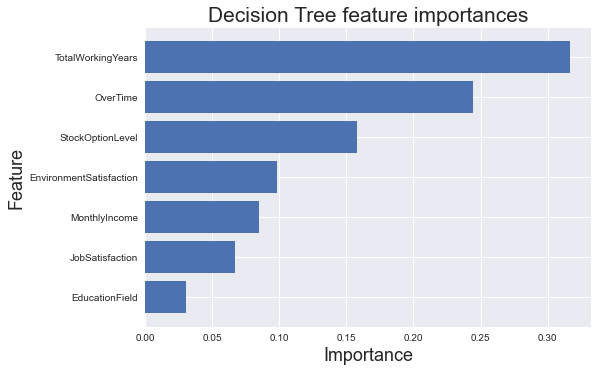

In [29]:
plt.style.use('seaborn')
feature = pd.DataFrame({'Feature_name': attributes, 'Importances' : dtc.feature_importances_})
feature = feature.sort_values('Importances' , ascending = True)
feature = feature[feature['Importances'] > 0.0]
plt.barh (feature['Feature_name'] , feature['Importances'])
plt.xlabel("Importance", size=18)
plt.ylabel("Feature", size=18)
plt.title("Decision Tree feature importances", size=21)

[Text(1162.5, 2495.6944444444443, 'TotalWorkingYears <= 1.5\nentropy = 0.659\nsamples = 897\nvalue = [744, 153]\nclass = No Attrition'),
 Text(775.0, 2202.0833333333335, 'entropy = 0.995\nsamples = 61\nvalue = [28, 33]\nclass = Attrition'),
 Text(1550.0, 2202.0833333333335, 'OverTime <= 0.5\nentropy = 0.593\nsamples = 836\nvalue = [716, 120]\nclass = No Attrition'),
 Text(775.0, 1908.4722222222222, 'JobSatisfaction <= 1.5\nentropy = 0.453\nsamples = 599\nvalue = [542, 57]\nclass = No Attrition'),
 Text(387.5, 1614.8611111111113, 'entropy = 0.684\nsamples = 110\nvalue = [90, 20]\nclass = No Attrition'),
 Text(1162.5, 1614.8611111111113, 'EnvironmentSatisfaction <= 1.5\nentropy = 0.387\nsamples = 489\nvalue = [452, 37]\nclass = No Attrition'),
 Text(775.0, 1321.25, 'entropy = 0.602\nsamples = 102\nvalue = [87, 15]\nclass = No Attrition'),
 Text(1550.0, 1321.25, 'MonthlyIncome <= 2500.5\nentropy = 0.315\nsamples = 387\nvalue = [365, 22]\nclass = No Attrition'),
 Text(1162.5, 1027.63888888

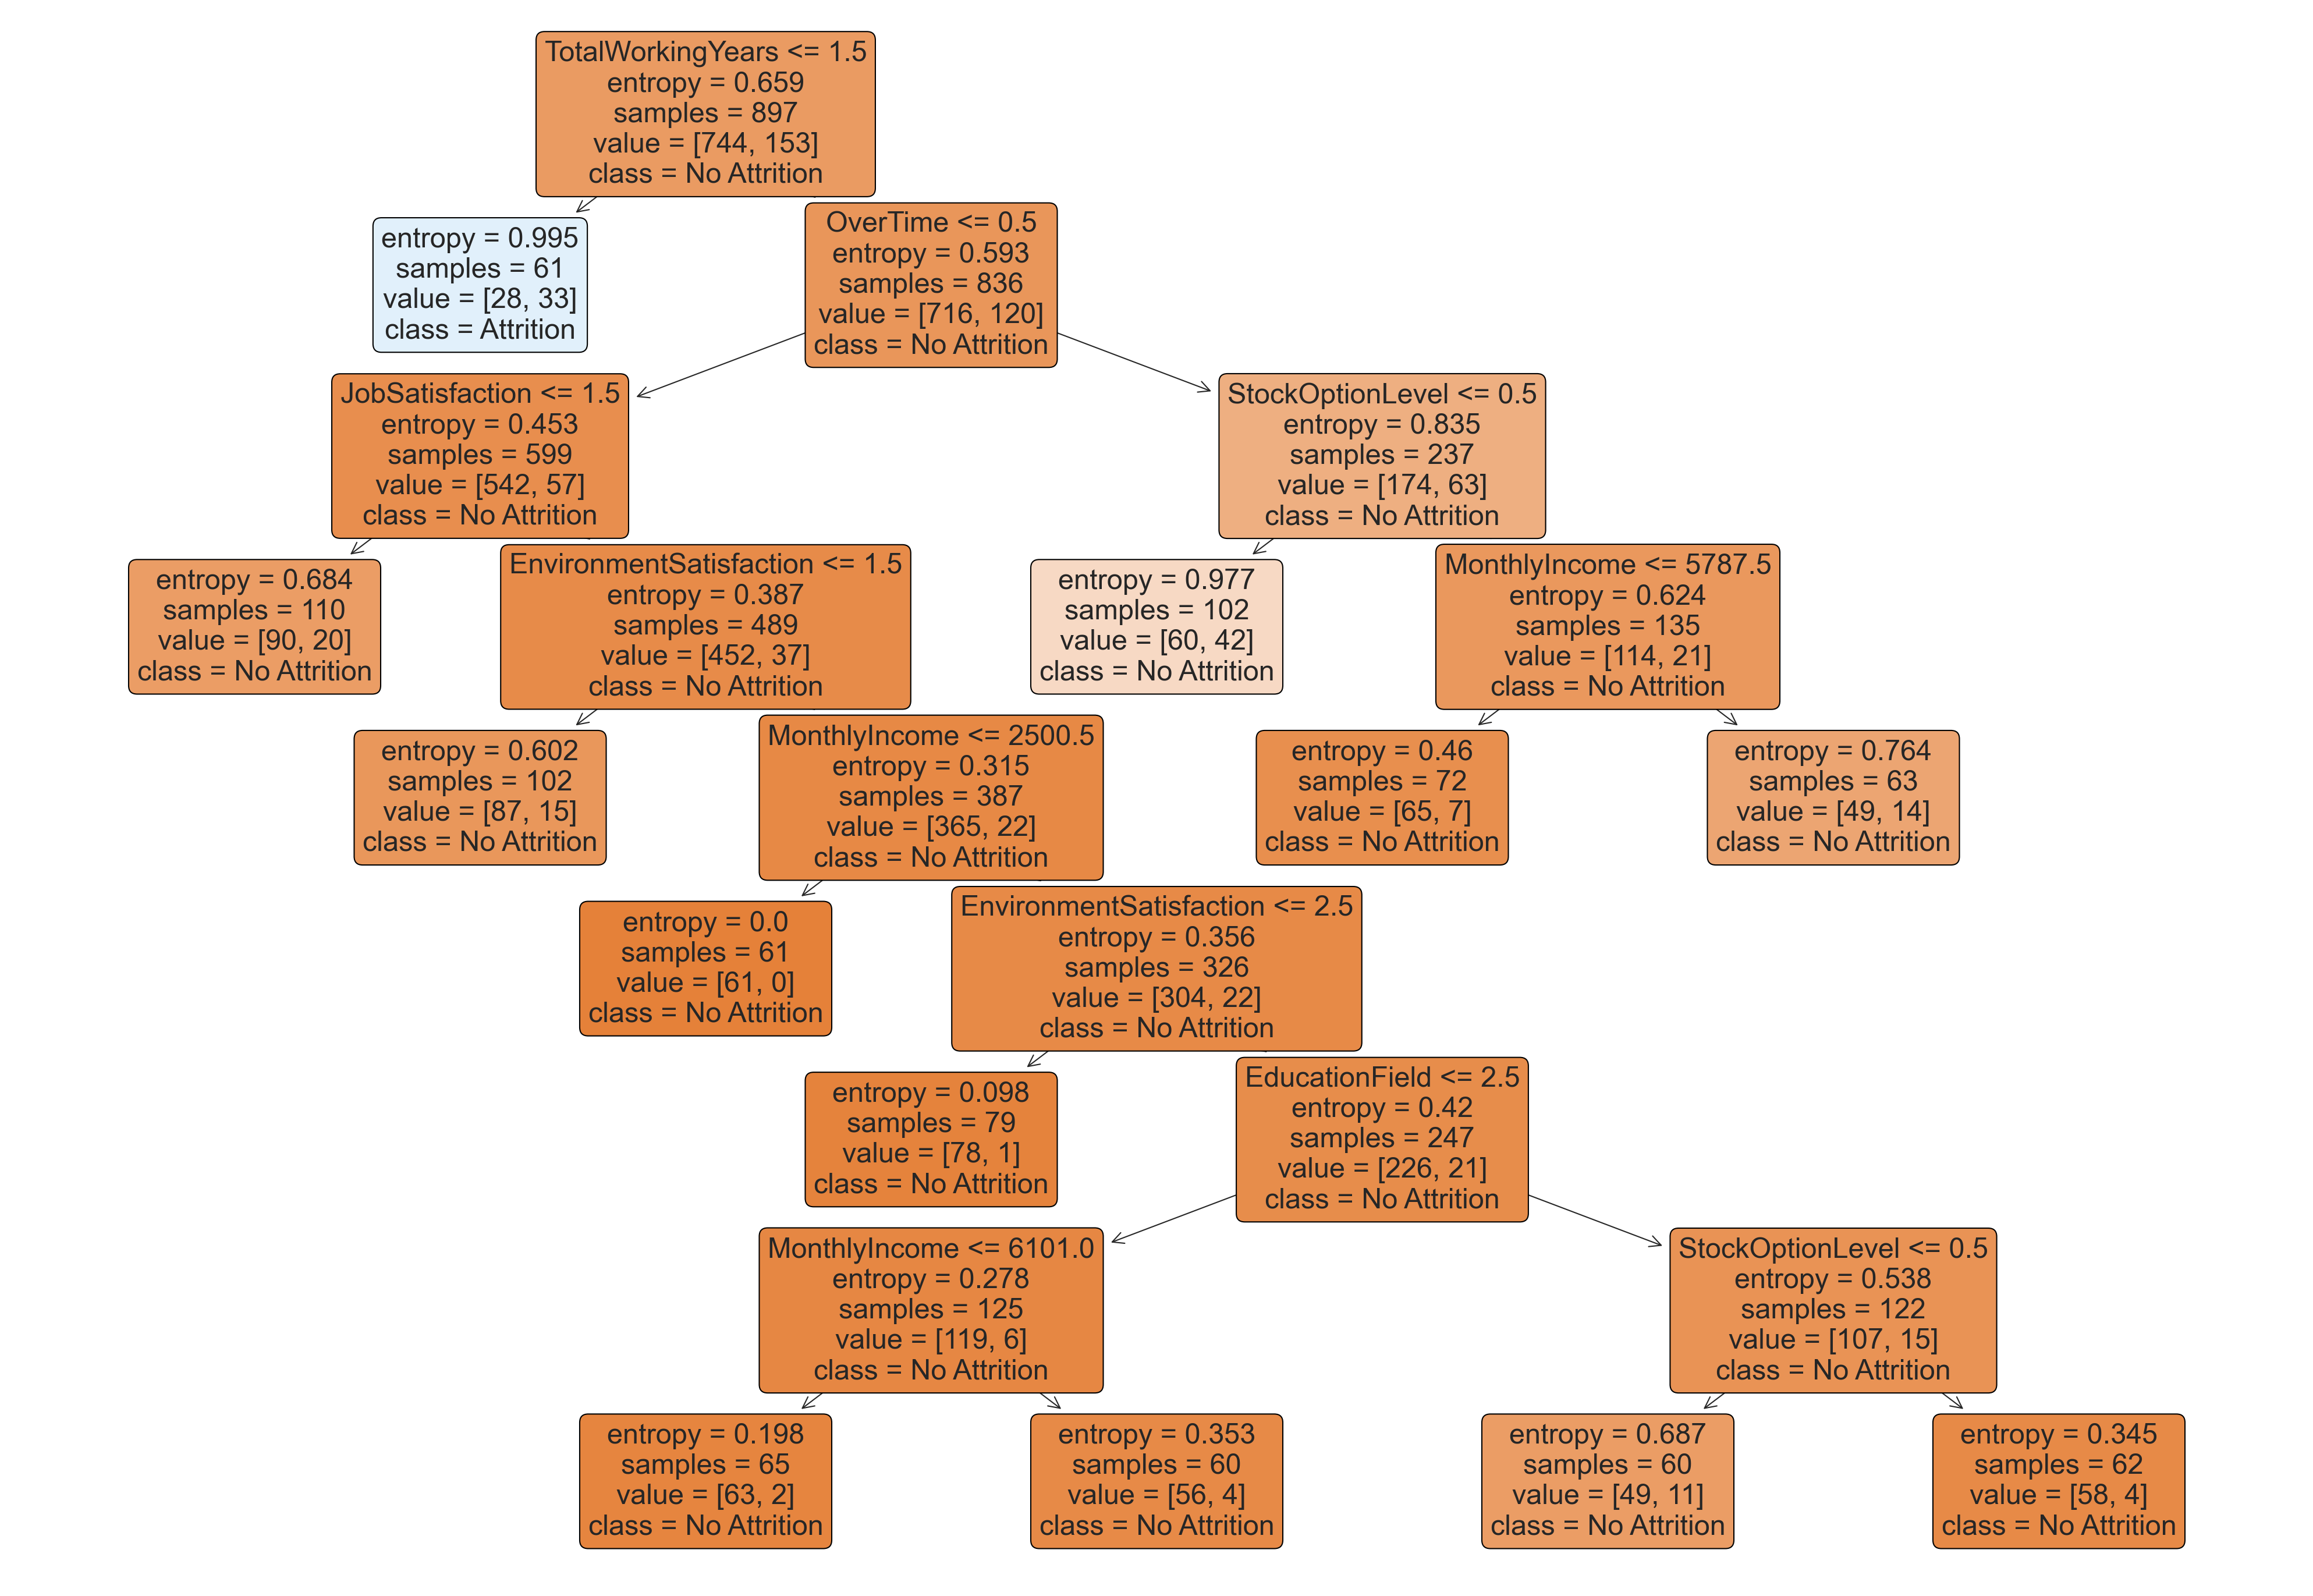

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=500)
tree.plot_tree(dtc,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in dtc.classes_],  
                                filled=True, rounded=True,
                                label = 'all' , max_depth = None, fontsize = 7)

In [31]:
'''
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
'''

"\ndot_data = tree.export_graphviz(clf, out_file=None,\n                                feature_names=attributes,\n                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in clf.classes_],  \n                                filled=True, rounded=True,  \n                                special_characters=True,\n                                max_depth=3)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())\n"

In [32]:
from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(dtc, out_file='tree.dot',
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in dtc.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=None)

In [33]:
'''graph = pydotplus.graph_from_dot_data(dot_data)  
img = Image(graph.create_png())
'''

'graph = pydotplus.graph_from_dot_data(dot_data)  \nimg = Image(graph.create_png())\n'

In [34]:
### dot -Tpng 'tree.dot' -o 'tree.png'    (PNG format)

In [35]:
#Convert to png

'''from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])'''

"from subprocess import call\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])"

In [36]:
# Display in jupyter notebook
'''from IPython.display import Image
Image(filename = 'tree(9).png')'''

"from IPython.display import Image\nImage(filename = 'tree(9).png')"

### Analyze the classification performance

In [37]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [38]:
y_pred = dtc.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.835005574136009
F1-score [0.90632911 0.30841121]


In [39]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       744
           1       0.54      0.22      0.31       153

    accuracy                           0.84       897
   macro avg       0.70      0.59      0.61       897
weighted avg       0.80      0.84      0.80       897



In [40]:
confusion_matrix(y_train, y_pred)

array([[716,  28],
       [120,  33]])

In [41]:
y_pred = dtc.predict(X_test)

In [42]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8195991091314031
F1-score [0.89785624 0.22857143]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       373
           1       0.41      0.16      0.23        76

    accuracy                           0.82       449
   macro avg       0.63      0.56      0.56       449
weighted avg       0.77      0.82      0.78       449



array([[356,  17],
       [ 64,  12]])

In [43]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))



print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.835005574136009
Train F1-score [0.90632911 0.30841121]
Test Accuracy 0.8195991091314031
Test F1-score [0.89785624 0.22857143]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       373
           1       0.41      0.16      0.23        76

    accuracy                           0.82       449
   macro avg       0.63      0.56      0.56       449
weighted avg       0.77      0.82      0.78       449



array([[356,  17],
       [ 64,  12]])

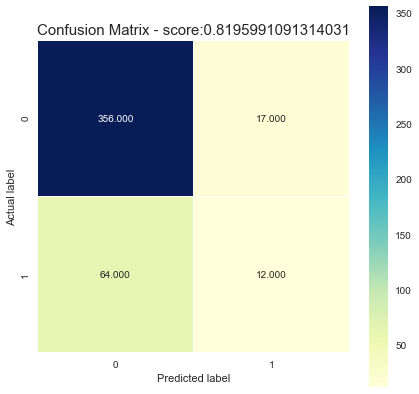

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       373
           1       0.41      0.16      0.23        76

    accuracy                           0.82       449
   macro avg       0.63      0.56      0.56       449
weighted avg       0.77      0.82      0.78       449



In [44]:
def conf_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(classification_report(y_test,y_pred))
conf_matrix(y_test,y_pred)

In [45]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

roc_auc1 = roc_auc_score(y_test, y_pred, average=None)

0.5561591646677014


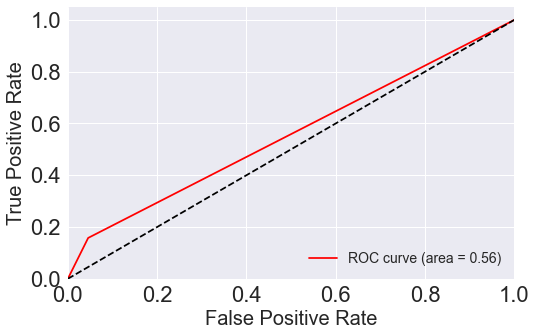

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % (roc_auc1), c = 'r')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0],)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtc, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(dtc, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8410 (+/- 0.03)
F1-score: 0.6030 (+/- 0.14)


In [48]:
'''def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')'''

'def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):\n    plt.figure(figsize=(8, 8))\n    plt.title("Precision and Recall Scores as a function of the decision threshold")\n    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")\n    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")\n    plt.ylabel("Score")\n    plt.xlabel("Decision Threshold")\n    plt.legend(loc=\'best\')'

### Can we improve the performance using another classifier?

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
param_list = {'max_depth': [None] + list(np.arange(2, 100)),
              'min_samples_split': [10, 20, 30, 50, 100, 150],
              'min_samples_leaf': [10, 20, 30, 50, 100, 150],
              'n_estimators': [100, 120, 130, 150, 200, 250],
              'criterion': ['gini','entropy'],
             }

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=2)


random_search = RandomizedSearchCV(rfc, param_distributions=param_list, n_iter=100, cv = 10)
random_search.fit(X, y)
dres = pd.DataFrame
dres = report(random_search.cv_results_, n_top=20).copy()
report_verbose(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.840 (std: 0.008)
Model with rank: 1
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.840 (std: 0.008)
Model with rank: 1
Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 34, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.839 (std: 0.008)
Model with rank: 3
Parameters: {'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 59, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.839 (std: 0.008)
Model with rank: 3
Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 38, 'criterion': 'entropy'}



In [51]:
#clf = RandomForestClassifier(n_estimators = 130, min_samples_split = 10, min_samples_leaf = 10, max_depth = 30, criterion = 'gini', )
rfc = random_search.best_estimator_
print(random_search.best_estimator_)

rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_tr = rfc.predict(X_train)


RandomForestClassifier(criterion='entropy', max_depth=70, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200)


In [52]:
estimator = rfc.estimators_[5]

In [53]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.850613154960981
Train F1-score [0.91738594 0.22093023]

Test Accuracy 0.8374164810690423
Test F1-score [0.91086691 0.07594937]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       373
           1       1.00      0.04      0.08        76

    accuracy                           0.84       449
   macro avg       0.92      0.52      0.49       449
weighted avg       0.86      0.84      0.77       449



array([[373,   0],
       [ 73,   3]])

In [54]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30, 30), dpi=500)
tree.plot_tree(estimator, feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in rfc.classes_],  
                                filled=True, rounded=True,
                                label = 'all' , max_depth = 9 , fontsize=5)

[Text(2927.619485294118, 10810.227272727272, 'TotalWorkingYears <= 2.5\nentropy = 0.641\nsamples = 561\nvalue = [751, 146]\nclass = No Attrition'),
 Text(854.779411764706, 9780.681818181818, 'WorkLifeBalance <= 2.5\nentropy = 0.993\nsamples = 46\nvalue = [38, 31]\nclass = No Attrition'),
 Text(512.8676470588235, 8751.136363636364, 'entropy = 0.887\nsamples = 14\nvalue = [7, 16]\nclass = Attrition'),
 Text(1196.6911764705883, 8751.136363636364, 'YearsSinceLastPromotion <= 0.5\nentropy = 0.911\nsamples = 32\nvalue = [31, 15]\nclass = No Attrition'),
 Text(854.779411764706, 7721.590909090909, 'MonthlyIncome <= 5979.075\nentropy = 0.993\nsamples = 22\nvalue = [17, 14]\nclass = No Attrition'),
 Text(512.8676470588235, 6692.045454545455, 'entropy = 0.964\nsamples = 10\nvalue = [11, 7]\nclass = No Attrition'),
 Text(1196.6911764705883, 6692.045454545455, 'entropy = 0.996\nsamples = 12\nvalue = [6, 7]\nclass = Attrition'),
 Text(1538.6029411764707, 7721.590909090909, 'entropy = 0.353\nsamples 

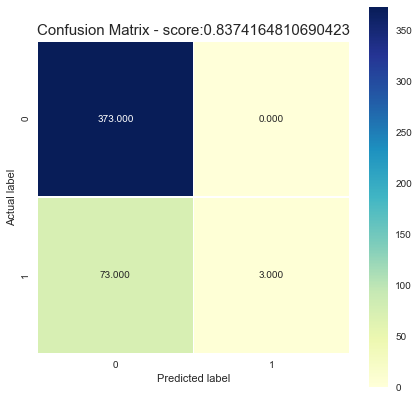

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       373
           1       1.00      0.04      0.08        76

    accuracy                           0.84       449
   macro avg       0.92      0.52      0.49       449
weighted avg       0.86      0.84      0.77       449



In [55]:
def conf_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(classification_report(y_test,y_pred))
conf_matrix(y_test,y_pred)

In [56]:
fpr2, tpr2, _ = roc_curve(y_test, y_pred)
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

roc_auc2 = roc_auc_score(y_test, y_pred, average=None)
roc_auc2

0.5197368421052632


0.5197368421052632

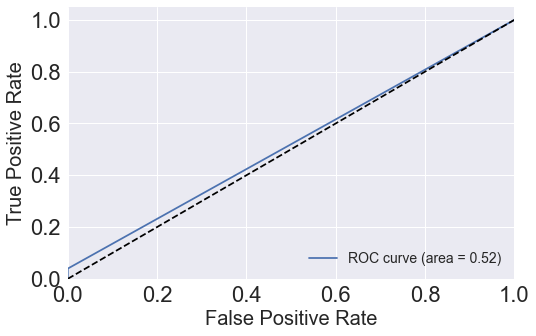

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % (roc_auc2))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8403 (+/- 0.02)
F1-score: 0.5083 (+/- 0.07)


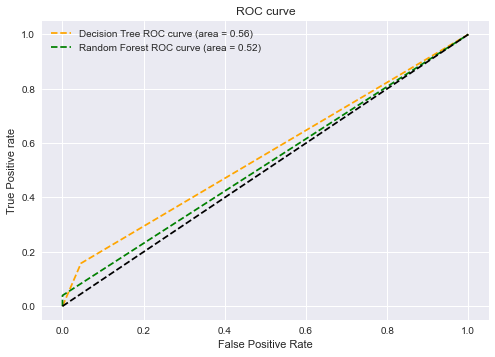

In [59]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest ROC curve (area = %0.2f)' % (roc_auc2))
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## KNN

In [89]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)
data_sc = pd.DataFrame(data_sc, columns = [['Age', 'Attrition','Department', 'DistanceFromHome' , 'EducationField' , 'EnvironmentSatisfaction' , 'Gender' , 'JobInvolvement' , 'JobRole' , 'JobSatisfaction' , 'MaritalStatus' , 'MonthlyIncome' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'StockOptionLevel' , 'TotalWorkingYears' , 'TrainingTimesLastYear', 'WorkLifeBalance',  'YearsAtCompany', 'YearsSinceLastPromotion' , 'YearsWithCurrManager']])


In [90]:
X = data.drop(columns = 'Attrition')
y = df[['Attrition']]

X_train, y_train = (X, y)

In [92]:
X1 = data_sc.drop(columns = 'Attrition')
y1 = df[['Attrition']]

X_test, y_test = (X1, y1)

In [93]:
y

Attrition
0             1
1             1
2             0
3             1
4             0
...         ...
1341          0
1342          1
1343          0
1344          0
1345          0

[1346 rows x 1 columns]

In [94]:
param_list = {
    'n_neighbors' : list(range(1, 30)),
    'algorithm': ['ball_tree', 'kd_tree','brute'],
    'weights': ['distance','uniform'],
    'leaf_size' : list(range(1, 150)),
    'metric' : ['euclidean' , 'cosine', 'minkowski']
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn,param_distributions=param_list, n_iter=50, cv = 3)
random_search.fit(X, y)
report_verbose(random_search.cv_results_, n_top=7)

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A col

Model with rank: 1
Mean validation score: 0.830 (std: 0.001)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'euclidean', 'leaf_size': 127, 'algorithm': 'brute'}

Model with rank: 1
Mean validation score: 0.830 (std: 0.001)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 21, 'metric': 'euclidean', 'leaf_size': 100, 'algorithm': 'brute'}

Model with rank: 1
Mean validation score: 0.830 (std: 0.001)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 17, 'metric': 'minkowski', 'leaf_size': 88, 'algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.830 (std: 0.001)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 21, 'metric': 'cosine', 'leaf_size': 62, 'algorithm': 'brute'}

Model with rank: 1
Mean validation score: 0.830 (std: 0.001)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 23, 'metric': 'euclidean', 'leaf_size': 68, 'algorithm': 'brute'}

Model with r

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82243942 0.82986663 0.82986663 0.82986663 0.8239242  0.82986663
        nan        nan 0.82986663 0.82243942        nan 0.82986663
 0.82541063        nan 0.80683596 0.82986663        nan 0.82986663
 0.82986663        nan 0.82095463 0.82095463 0.82986663 0

In [95]:
clf = random_search.best_estimator_
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [96]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))



print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8306092124814265
Train F1-score [0.90739236 0.00869565]
Test Accuracy 0.8298662704309064
Test F1-score [0.90702395 0.        ]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1117
           1       0.00      0.00      0.00       229

    accuracy                           0.83      1346
   macro avg       0.41      0.50      0.45      1346
weighted avg       0.69      0.83      0.75      1346



/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

array([[1117,    0],
       [ 229,    0]])

In [97]:
fpr3, tpr3, _ = roc_curve(y_test, y_pred)
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)

roc_auc3 = roc_auc_score(y_test, y_pred, average=None)
roc_auc3

0.5


0.5

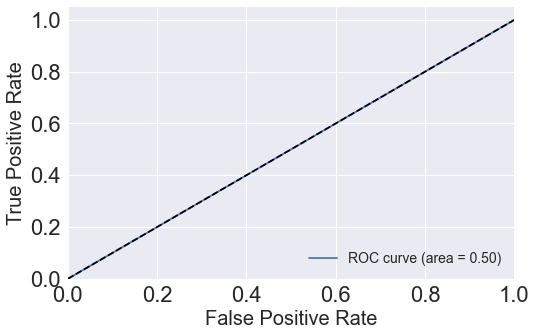

In [98]:
plt.figure(figsize=(8, 5))
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % (roc_auc3))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

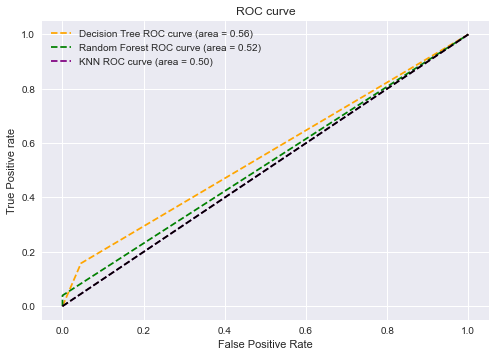

In [99]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest ROC curve (area = %0.2f)' % (roc_auc2))
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='KNN ROC curve (area = %0.2f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()